In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torchaudio

from utils.audio_processor import AudioProcessor
from utils.generic_utils import load_config

import os

In [2]:
#for dirname, _, filenames in os.walk('../SPIRA_Dataset_V1/pacientes/'):
#    print(dirname)
#    print(filenames)

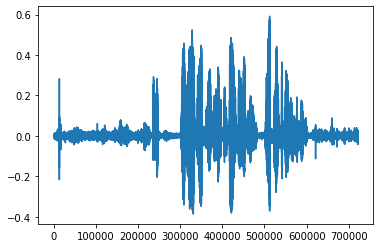

In [3]:
waveform, sample_rate = torchaudio.load('../SPIRA_Dataset_V1/pacientes/PTT-20200609-WA0011.wav')
plt.plot(waveform.t().numpy())

In [4]:
c = load_config('config.json')
ap = AudioProcessor(**c.audio)

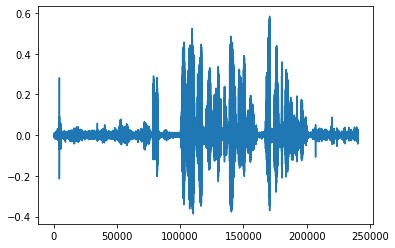

In [5]:
waveform = ap.load_wav('../SPIRA_Dataset_V1/pacientes/PTT-20200609-WA0011.wav')
plt.plot(waveform.t().numpy())


torch.Size([240640, 1])
torch.Size([1, 120, 1502])
torch.Size([120, 1502])


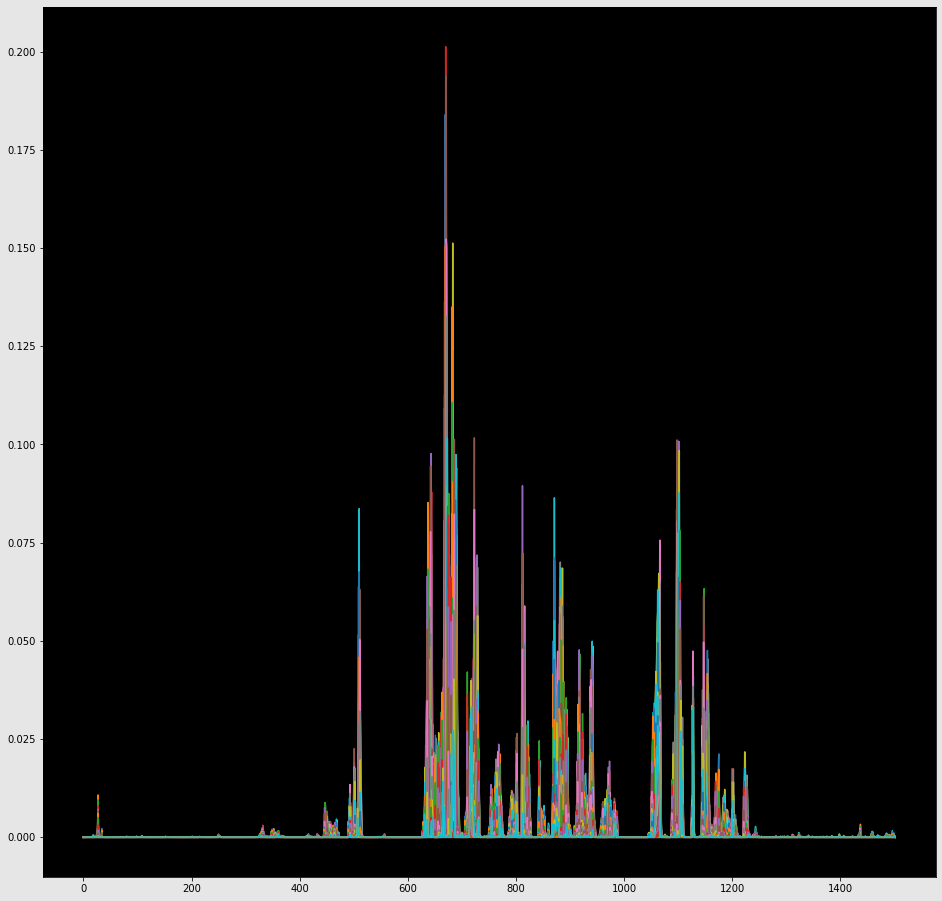

In [6]:
hpcp = ap.get_feature_from_audio(waveform)
print(waveform.t().shape) # numpy array shape   = [timestamp, amplitude]
print(hpcp.size())        # torch.tensor size() = [batch_size(1), num_features, seq_len]
print(hpcp[0].size())
fig = plt.figure(figsize=(16,16), facecolor=(0.9, 0.9, 0.9), )
ax = fig.add_subplot(1, 1, 1)ricardo
ax.set_facecolor((0., 0., 0.))
hpcp = hpcp.transpose(1, 2) # when not transposing 1 and 2, the plot starts looking like a interpolation of waves instead of a "spectrogram of sime kind" a.k.a. HPCP
plt.plot(hpcp[0])
plt.show()